# 07. 역행렬

In [30]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
plt.rcParams.update({'font.size':14}) 

<br>

## 07.01. 역행렬
- **행렬 $A$의 역행렬은 $A$와 곱해서 단위 행렬을 만드는 행렬 $A^{-1}$을 의미**

$$A^{-1}A = I$$

$$\downarrow$$

$$Ax = b$$
$$A^{-1}Ax = A^{-1}b$$
$$x = A^{-1}b$$


- **또한 LIVE EVIL이 성립**

$$(LIVE)^{-1} = E^{-1}V^{-1}I^{-1}L^{-1}$$

<br>

## 07.02. 역행렬의 유형과 가역성의 조건
- **모든 행렬이 역행렬을 가지지 않음**

<br>

### 완전 역행렬
- **모든 정방 최대계수 행렬은 역행렬을 가지며, 완전 역행렬을 갖는 모든 행렬은 정방이며 최대계수**
    

$$A^{-1}A = A A^{-1} = I$$

<br>

### 단방향 역행렬
- **단방향 역행렬은 정방이 아닌 행렬을 단위 행렬로 변환하며, 하나의 곱셈 방향에 대해서만 동작**
- **정방이 아닌 행렬은 최대로 가능한 계수일 때만 단방향 역행렬을 가짐**

<br>

- 높은 행렬 $T$는 계수가 $N$ (최대열계수)이면, 왼쪽 역행렬을 가짐

$$LT = I,\;\;\;TL\neq I$$

- 넓은 행렬 $W$는 계수가 $R$ (최대행계수)이면, 오른쪽 역행렬을 가짐

$$WR = I,\;\;\;RW \neq I$$

<br>

### 의사역행렬 (pseudo inverse)
- **행렬을 단위 행렬에 가깝게 만드는 변환 행렬**
- **모든 행렬에는 모양과 계수에 관계없이 의사역행렬이 존재**
- 행렬이 정방 최대계수이면 의사역행렬은 완전 역행렬과 같음

    행렬이 정방이 아니면서 최대로 가능한 계수를 갖는다면, 왼쪽 역행렬 (높은 역행렬일 시) 또는 오른쪽 역행렬 (넓은 역행렬일 시)을 가짐

<br>

### 특이 행렬
- **특이 (비가역) 행렬 : 완전 역행렬 또는 단방향 역행렬이 존재하지 않는 행렬**

    - **축소 행렬은 역행렬을 가지지 않는 특이 행렬**

<br>

## 07.03. 역행렬 계산

<br>

### $2\times 2$ 행렬의 역행렬
- **대각 원소를 교황하고, 대각이 아닌 원소에 -1을 곱한 다음, 행렬식으로 나눔**

$$A = \begin{bmatrix} a&b\\c&d \end{bmatrix}$$

$$A^{-1} = \frac{1}{det(A)} \begin{bmatrix} d&-b\\-c&a \end{bmatrix}$$

<br>

#### `np.linalg.inv()`

In [31]:
A = np.array([ [1,4],[2,7] ])

Ainv = np.linalg.inv(A)

A@Ainv

array([[1., 0.],
       [0., 1.]])

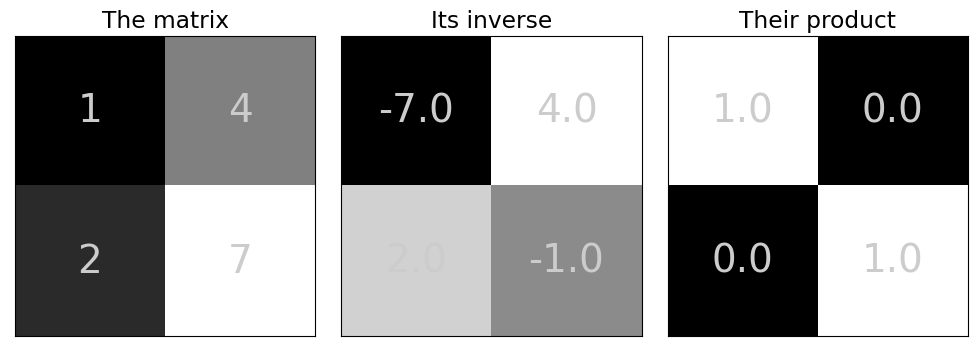

In [33]:
fig,axs = plt.subplots(1,3,figsize=(10,6))

axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j,i),num in np.ndenumerate(A):
  axs[0].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

axs[1].imshow(Ainv,cmap='gray')
axs[1].set_title('Its inverse')
for (j,i),num in np.ndenumerate(Ainv):
  axs[1].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)

AAi = A@Ainv
axs[2].imshow(AAi,cmap='gray')
axs[2].set_title('Their product')
for (j,i),num in np.ndenumerate(AAi):
  axs[2].text(i,j,num,color=[.8,.8,.8],ha='center',va='center',fontsize=28)


for i in range(3):
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.show()

<br>

### 대각 행렬의 역행렬
- **대각 행렬의 역행렬은, 대각 원소를 역수로 뒤집은 형태**
    
    **하지만 대각선에 0이 있는 대각행렬은, 대각 원소의 역수를 구할 수 없음 $\rightarrow$ 역행렬이 존재하지 않음**
    


In [34]:
D = np.diag( np.arange(1,6) )
Dinv = np.linalg.inv(D)

print('대각행렬:')
print(D), print(' ')

print('역행렬:')
print(Dinv), print(' ')

print('곱:')
print(D@Dinv)

대각행렬:
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
 
역행렬:
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]
 
곱:
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


<br>

### 임의의 정방 최대계수 행렬의 역행렬

- **역행렬 계산 알고리즘은 4개의 중간 행렬이 포함**

<br>

#### 1. 소행렬 (minors matrix)
- 소행렬의 각 원소 $m_{i,j}$는 $i$번째 행과 $j$번째 열을 제외하고 만든 부분행렬의 행렬식

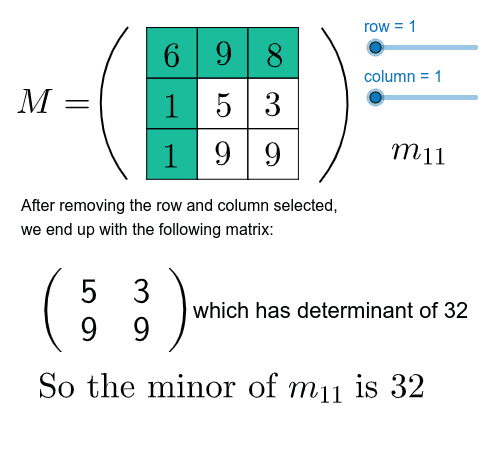

<br>

#### 2. 격자행렬 (grid matrix)
- 격자 행렬의 원소

$$g_{i,j} = -1^{i+j}$$

<br>

#### 3. 여인수행렬 (confactors matrix)
- 소행렬과 격자행렬의 아다마르곱의 결과

<br>

#### 4. 수반행렬 (adjugate matrix)
- 여인수행렬의 전치와, 원래 행렬(여인수행렬이 아니라 역행렬을 구하려는 행렬)의 행렬식의 역수를 스칼라 곱셈한 것 

    $\rightarrow$ 원래 행렬의 역행렬

<br>

#### 임의의 정방 행렬 역행렬 예시

In [73]:
m = 4
A = np.random.randn(m,m)
print(A)

[[ 1.32247224 -0.36467842  1.06772869  1.31350201]
 [ 1.34780276  0.32272758 -0.11443607 -1.33555985]
 [ 0.91454239  1.05890364 -0.73779636 -0.06081714]
 [-0.64133023 -0.59715184  1.43201235 -1.88195686]]


- 소행렬 & 격자 행렬 생성

In [74]:
M = np.zeros((m,m)) 
G = np.zeros((m,m)) 

In [75]:
for i in range(m):
  for j in range(m):
    
    rows = [True]*m
    rows[i] = False
    
    cols = [True]*m
    cols[j] = False
    
    M[i,j]=np.linalg.det(A[rows,:][:,cols])
    
    G[i,j] = (-1)**(i+j)

In [76]:
M

array([[-1.19276869,  0.67023509, -2.34443193,  1.16477949],
       [ 3.04148964,  4.92947223, -3.15067039,  1.86973189],
       [ 1.24131866,  8.87569052, -3.88059966,  0.55953828],
       [-1.28583921, -3.67923747,  3.74680106,  0.72960818]])

In [77]:
G

array([[ 1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.],
       [-1.,  1., -1.,  1.]])

- 여인수 행렬

In [78]:
C = M * G
C

array([[-1.19276869, -0.67023509, -2.34443193, -1.16477949],
       [-3.04148964,  4.92947223,  3.15067039,  1.86973189],
       [ 1.24131866, -8.87569052, -3.88059966, -0.55953828],
       [ 1.28583921, -3.67923747, -3.74680106,  0.72960818]])

- 수반 행렬

In [79]:
Ainv = C.T / np.linalg.det(A)

- 일반 역행렬

In [80]:
AinvI = np.linalg.inv(A)

# compare against inv()
np.round( AinvI-Ainv ,8)

array([[ 0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0.],
       [ 0.,  0.,  0., -0.]])

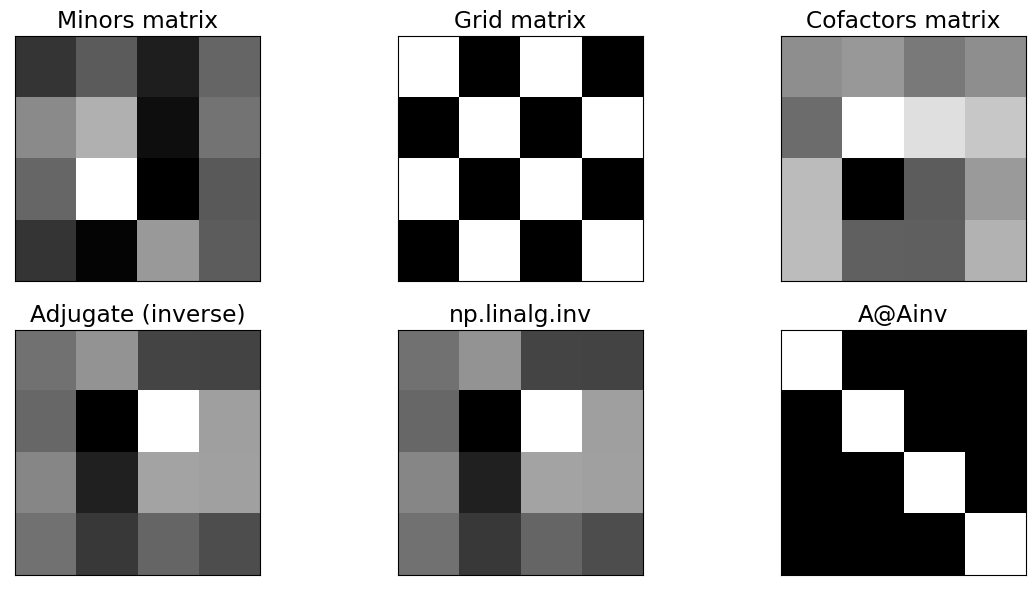

In [82]:
fig,axs = plt.subplots(2,3,figsize=(14,7))

axs[0,0].imshow(M,cmap='gray')
axs[0,0].set_title('Minors matrix')

axs[0,1].imshow(G,cmap='gray')
axs[0,1].set_title('Grid matrix')

axs[0,2].imshow(C,cmap='gray')
axs[0,2].set_title('Cofactors matrix')

axs[1,0].imshow(Ainv,cmap='gray')
axs[1,0].set_title('Adjugate (inverse)')

axs[1,1].imshow(AinvI,cmap='gray')
axs[1,1].set_title('np.linalg.inv')

axs[1,2].imshow(A@Ainv,cmap='gray')
axs[1,2].set_title('A@Ainv')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])

plt.show()

<br>

### 단방향 역행렬
- 높은 행렬은 완전 역행렬을 가지지 않음
    
    **크기가 $M>N$인 행렬 $T$에 대해서 $TT^{-1}=T^{-1}T = I$을 만족하는 완전 역행렬 $T^{-1}$은 존재하지 않음**

<br>

- **왼쪽 역행렬은 최대열계수를 갖는 높은 행렬에 대해서만 정의**

    - **크기가 $M>N$이고, 행렬의 계수가 $r < N$인 행렬은 축소 행렬이기에 왼쪽 역행렬이 없음**

<br>

- **하지만 $LT=I$를 만족하는 행렬 왼쪽 역행렬 $L$은 존재**
    - **왼쪽 역행렬 $L$을 계산하기 위하여, 정방이 아닌 행렬에 전치를 곱하여 정방 행렬로 만듬**
    - **$T$가 최대열계수라면 $T^T T$는 최대 계수 $\rightarrow$ 완전 역행렬 $(T^T T)^{-1}$을 가짐**
        
        따라서
    
$$I = (T^T T)^{-1} (T^T T)$$

$$L = T^{-1} = (T^T T)^{-1} (T^T)$$

<br>

#### 왼쪽 역행렬 생성 예시

- 최대열계수를 가지는 높은 행렬 $T$

In [40]:
T = np.random.randint(-10,11,size=(40,4))
print(T.shape)
print( f'행렬의 계수={np.linalg.matrix_rank(T)}' )

(40, 4)
행렬의 계수=4


- 행렬의 전치를 곱한 $T^T T$와 역행렬 $(T^T T)^{-1}$

In [41]:
TtT = T.T@T

TtT_inv = np.linalg.inv(TtT)
print( np.round(TtT_inv@TtT,4) )

[[ 1. -0.  0. -0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1. -0.]
 [ 0.  0.  0.  1.]]


- $L=T^{-1}$

In [44]:
L = TtT_inv @ T.T

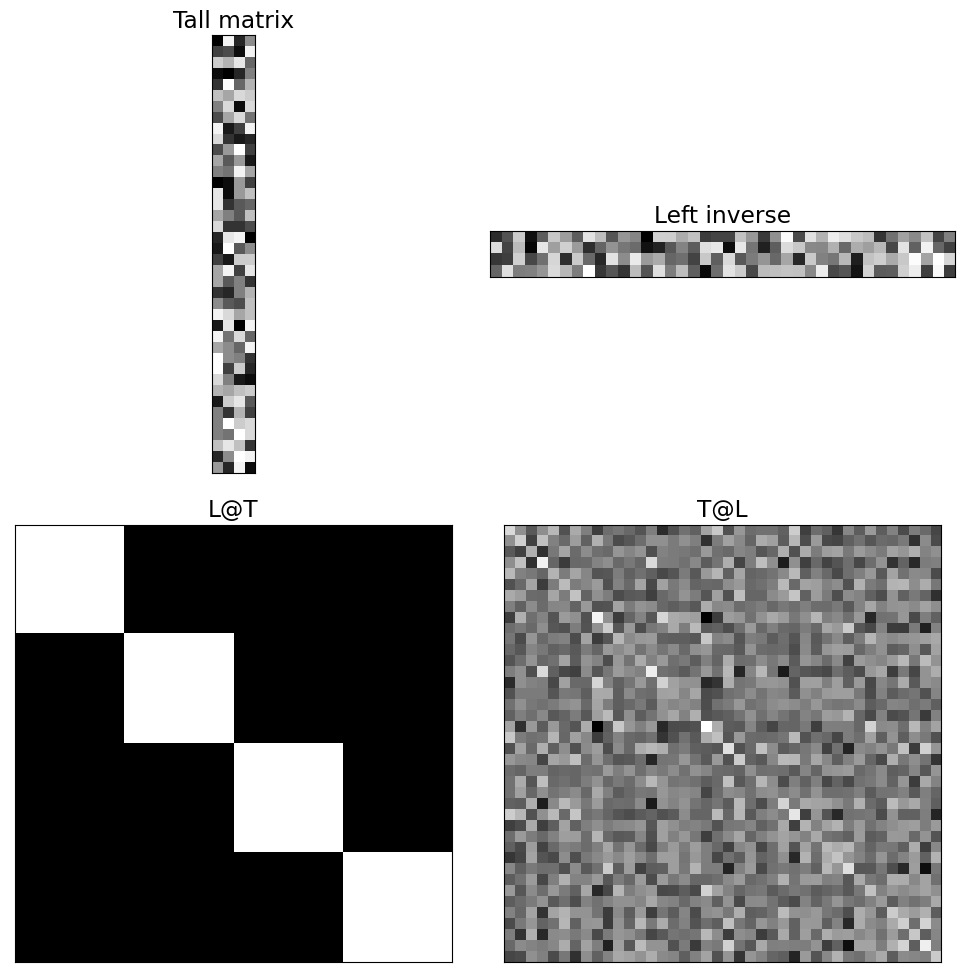

In [45]:
fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(T,cmap='gray')
axs[0,0].set_title('Tall matrix')

axs[0,1].imshow(L,cmap='gray')
axs[0,1].set_title('Left inverse')

axs[1,0].imshow(L@T,cmap='gray')
axs[1,0].set_title('L@T')

axs[1,1].imshow(T@L,cmap='gray')
axs[1,1].set_title('T@L')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()

<br>

#### 오른쪽 행렬 생성 예시
- 최대행계수를 가지는 넓은 행렬 $W$

In [84]:
W = np.random.randint(-10,11,size=(4,40))
print( f'행렬의 계수={np.linalg.matrix_rank(W)}' )

행렬의 계수=4


- 행렬의 전치를 곱한 $W W^T$와 역행렬 $(W W^T)^{-1}$

In [86]:
WWt = W@W.T

WWt_inv = np.linalg.inv(WWt)
print( np.round(WWt_inv@WWt,4) )

[[ 1. -0. -0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1. -0.]
 [ 0. -0.  0.  1.]]


- $R = W^-1$

In [87]:
R = W.T @ WWt_inv

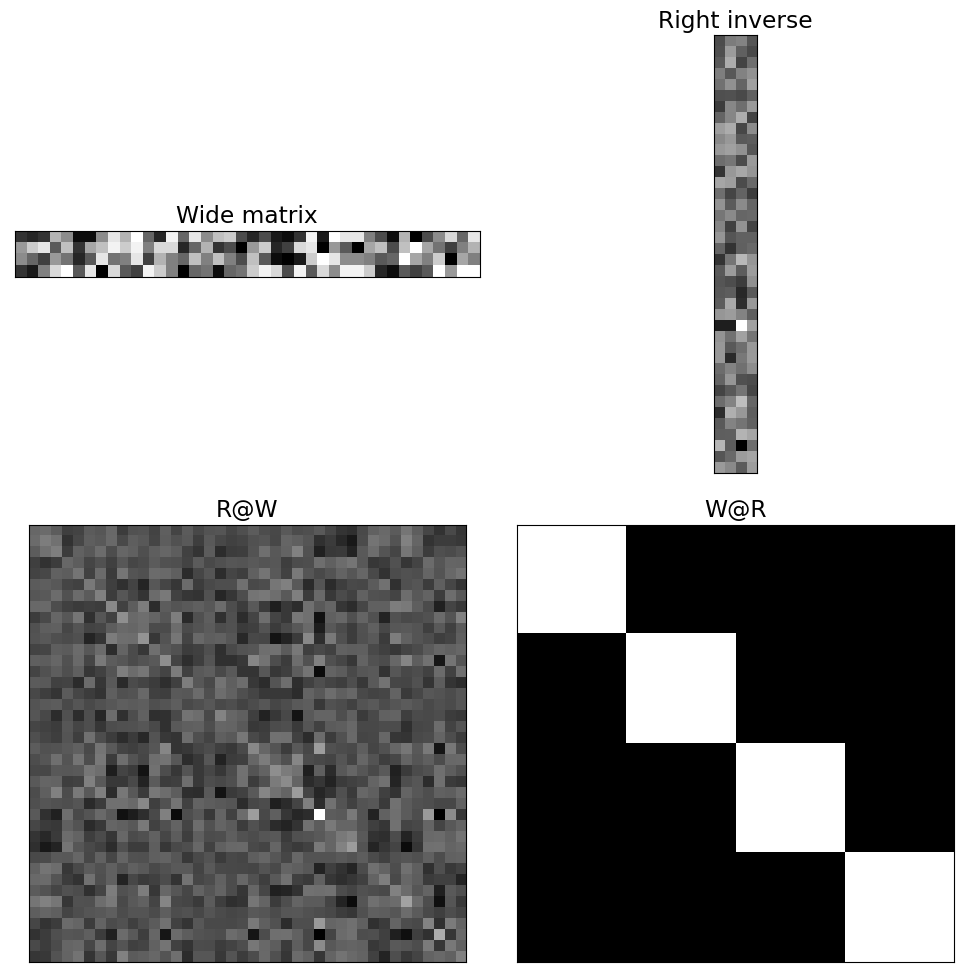

In [88]:
fig,axs = plt.subplots(2,2,figsize=(10,10))

axs[0,0].imshow(W,cmap='gray')
axs[0,0].set_title('Wide matrix')

axs[0,1].imshow(R,cmap='gray')
axs[0,1].set_title('Right inverse')

axs[1,0].imshow(R@W,cmap='gray')
axs[1,0].set_title('R@W')

axs[1,1].imshow(W@R,cmap='gray')
axs[1,1].set_title('W@R')

for a in axs.flatten():
  a.set_xticks([])
  a.set_yticks([])
  
plt.tight_layout()
plt.show()

<br>

## 07.04 역행렬의 유일성
- **역행렬이 있다면 정확히 하나만 존재**

<br>

## 07.05. 무어-펜로즈 의사역행렬
- 행렬 곱셈을 통해 축소계수 행렬을 단위 행렬로 변환하는 것은 불가능
    
    즉, 축소계수 행렬은 완전 또는 단방향 역행렬을 가지지 않음
    
- **하지만 특이 행렬은 의사역행렬들을 가짐**
- 완전 역행렬은 고유하지만, 의사역행렬은 고유하지 않음
    - 축소계수 행렬에는 무한한 수의 의사역행렬이 존재
    
        **$\rightarrow$ 실제로 가장 나은 사용할 의사역행렬은 단 하나이며, 이는 무어-펜로즈 의사역행렬 (Moore Penrose pseudo matrix)**
        

<br>

#### `np.linalg.pinv()`

<br>

- 행렬의 의사역행렬 $A^+$

In [47]:
A = np.array([ [1,4],[2,8] ])

Apinv = np.linalg.pinv(A)
print(Apinv*85)

[[1. 2.]
 [4. 8.]]


- 행렬과 의사역행렬의 곱

In [49]:
print(A@Apinv)

[[0.2 0.4]
 [0.4 0.8]]


<br>

## 07.06. 역행렬의 수치적 안정성
- 행렬의 역행렬을 계산하려면, 많은 행렬식을 포함하여 상당한 부동 소수점 연산이 수반
- 행렬의 행렬식은 수치적으로 불안정할 수 있으므로, 많은 행렬식을 계산하면, 수치적 부정확성이 발생
    
    이러한 부정확성이 누적되면 큰 행렬을 연산할 때 문제의 발생 야기
    
<br>

### 수치적으로 불안정한 행렬

<br>

#### 힐버트 행렬
- 힐버트 행렬의 각 원소

$$h_{i,j} = \frac{1}{i+j-1}$$

- $3 \times 3$ 힐버트 행렬

$$\begin{bmatrix} 1&1/2&1/3\\1/2&1/3&1/4\\1/3&1/4&1/5 \end{bmatrix}$$

#### `scipy.linalg.hilbert()`

In [95]:
from scipy.linalg import hilbert
print( hilbert(5) )

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


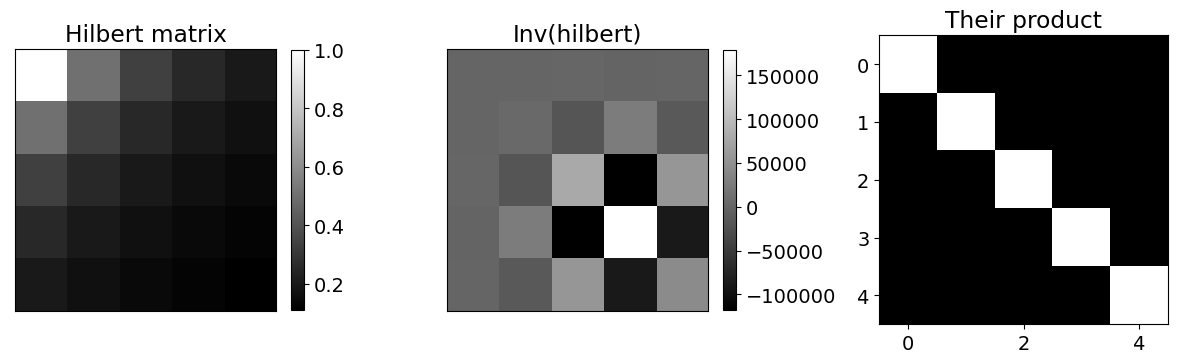

In [96]:
H = hilbmat(5)
Hi = np.linalg.inv(H)

fig,axs = plt.subplots(1,3,figsize=(12,6))
h = [0,0,0]

# the matrix
h[0] = axs[0].imshow(H,cmap='gray')
axs[0].set_title('Hilbert matrix')

# its inverse
h[1] = axs[1].imshow(Hi,cmap='gray')
axs[1].set_title('Inv(hilbert)')

# their product
h[2] = axs[2].imshow(H@Hi,cmap='gray')
axs[2].set_title('Their product')

for i in range(2):
  fig.colorbar(h[i],ax=axs[i],fraction=.045)
  axs[i].set_xticks([])
  axs[i].set_yticks([])

plt.tight_layout()
plt.show()

<br>

#### 힐버트 행렬의 크기에 따른 의사역행렬 예시
- 3 ~ 12의 $N$에 대해서 $N\times N$ 힐버트 행렬 생성
- 생성한 힐버트 행렬의 역행렬 계산
- 힐버트 행렬과 $\times$ 힐버트 행렬의 역행렬 곱과, $N\times N$의 항등 행렬사이의, 유클리디안 거리와 조건수를 계산
    - **조건수 : 행렬에서 수칫값의 퍼짐 정도를 나타내는 척도**
    
        **`np.linalg.cond()`**

<br>

- **위 과정을 난수 행렬에도 동일하게 적용하여, 힐버트 행렬과 비교**

In [104]:
matSizes = np.arange(3,13)

identityError = np.zeros((len(matSizes),2))
condNumbers   = np.zeros((len(matSizes),2))

In [107]:
for i,k in enumerate(matSizes):
    
    # 힐버트 행렬
    H   = hilbmat(k)   
    Hi  = np.linalg.inv(H) 
    HHi = H@Hi             
    err = HHi - np.eye(k)  
    identityError[i,0] = np.sqrt(np.sum(err**2))  # 유클리디안 거리
    condNumbers[i,0] = np.linalg.cond(H) # 조건수
    
    # 난수 행렬
    H = np.random.randn(k,k) 
    Hi  = np.linalg.inv(H)   
    HHi = H@Hi              
    err = HHi - np.eye(k)   
    identityError[i,1] = np.sqrt(np.sum(err**2))  # 유클리디안 거리
    condNumbers[i,1] = np.linalg.cond(H) # 조건수

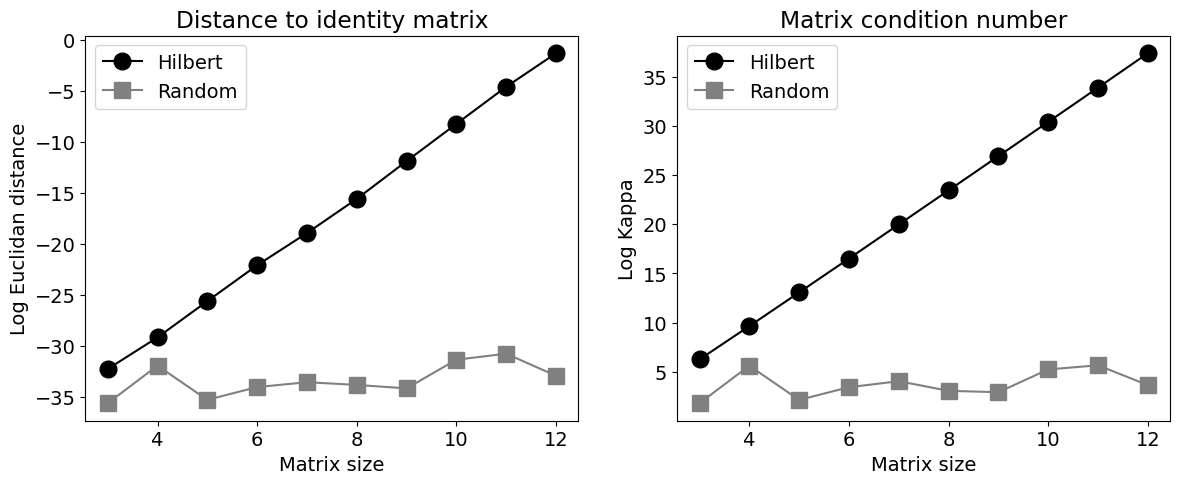

In [106]:
fig,axs = plt.subplots(1,2,figsize=(14,5))

h = axs[0].plot(matSizes,np.log(identityError),'s-',markersize=12)
h[0].set_color('k') 
h[0].set_marker('o')
h[1].set_color('gray')

axs[0].legend(['Hilbert','Random'])
axs[0].set_xlabel('Matrix size')
axs[0].set_ylabel('Log Euclidan distance')
axs[0].set_title('Distance to identity matrix')

h = axs[1].plot(matSizes,np.log(condNumbers),'s-',markersize=12)
h[0].set_color('k') 
h[0].set_marker('o')
h[1].set_color('gray')

axs[1].legend(['Hilbert','Random'])
axs[1].set_xlabel('Matrix size')
axs[1].set_ylabel('Log Kappa')
axs[1].set_title('Matrix condition number')

plt.show()

In [ ]:
## interesting to see the "identity" matrix
H   = hilbmat(k)
Hi  = np.linalg.inv(H)
HHi = H@Hi 

plt.imshow(HHi,vmin=0,vmax=.1)
plt.title('Should be identity')
plt.colorbar();

- 행렬의 크기에 따라 반올림 오차가 급격히 증가

<br>

## 07.07. 역행렬의 기하학적 해석
- **역행렬은 행렬 곱셈으로 인한 기하학적 변환을 되돌림**


<br>

#### 예시
- 행렬과 역행렬

In [89]:
T = np.array([ 
              [1,.5],
              [0,.5]
            ])

Ti = np.linalg.inv(T)

- 행렬의 변환

In [90]:
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

transformedPoints = T @ origPoints

- 행렬의 변환 되돌림

In [91]:
backTransformed   = Ti @ transformedPoints

C:\Users\FORYOUCOM\AppData\Local\Temp\ipykernel_24964\3721122263.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(backTransformed[0,:],backTransformed[1,:],'rx',markersize=15, color=[.7,.7,.7],label='Inverse-transformed')


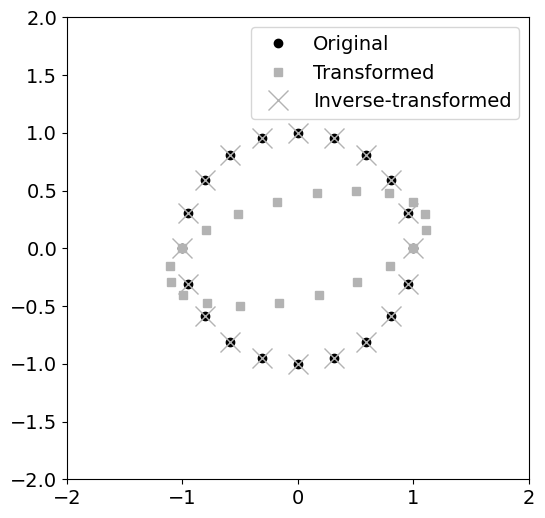

In [92]:
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s', color=[.7,.7,.7],label='Transformed')
plt.plot(backTransformed[0,:],backTransformed[1,:],'rx',markersize=15, color=[.7,.7,.7],label='Inverse-transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()


<br>

$$Q = TP$$

$$U = T^{-1}Q$$

$$U = T^{-1}TP$$

* **특이 행렬에 의한 변환의 기하학적 효과는 적어도 하나의 차원이 평평해진다는 것을 의미**

    **$\rightarrow$ 한 차원이 평평해지면, 그 차원은 다시 평평하게 만들 수 없음**